# TITANIC PROJECT



## Importing Libraries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

In [2]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Importing the dataset and analyze all the columns 

## Shape of data with number of rows and columns


In [3]:
df.shape

(891, 12)

There are 891 rows and 12 columns in dataset

## Detailed Description

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

## Datatypes of all columns

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have object datatype in Name, Sex, Ticket, Cabin and Embarked. Age and Fare are floating datatype and rest are integer datatypes. All are independent variable except Survived. Survived is a target variable.

## Checking for null values

In [6]:
#check for is there any null values present in the dataset 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are three columns are having missing values in dataset. As we see null values present, we need to work on that.

<AxesSubplot:>

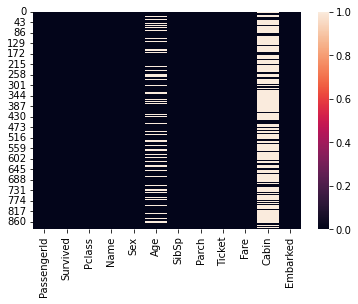

In [7]:
#To check missing values
sns.heatmap(df.isnull())

In [8]:
#target variable
df['Survived'].unique()

array([0, 1], dtype=int64)

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Encoding or Dropping the column

### 1. Dropping Name column

In [10]:
#check unique values for name column
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [11]:
#value counts of Name column
df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Name column is having all unique values. So, we can drop 'Name' column

In [12]:
#drop Name column
df.drop(['Name'], axis=1, inplace=True)

Name column is dropped

### 2. Encoding 'sex' column 

In [13]:
# Check unique values of 'sex' column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
#value caounts of 'sex' column
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#encoding with label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'].astype(object))

In [16]:
#after encoding check unique values of 'sex' column
df['Sex'].unique()

array([1, 0])

In [17]:
#after encoding value caounts of 'sex' column
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

### 3. Encode/Drop Ticket column

In [18]:
# Check unique values of 'ticket' column
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
#value counts of 'ticket' column
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [20]:
#Number of unique values of 'ticket' columns
df['Ticket'].nunique()

681

In [21]:
#find how many percent of unique value present in 'ticket' column
(681/891) *100

76.43097643097643

as we have seen above there is 76.43% unique values present in 'Ticket' column.

which is near to 80%, so we can drop that column.

In [22]:
#drop 'Ticket' column
df.drop(['Ticket'], axis=1, inplace=True)

Ticket column is dropped.

### 4. Encode/Drop Cabin column

In [23]:
# Check unique values of 'Cabin' column
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
#value counts of 'cabin' column
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [25]:
df['Cabin'].isnull().sum()

687

In [26]:
#find how many percent of unique value present in ticket column
print("{0:.0%}".format(df['Cabin'].isnull().value_counts()[1]/df.shape[0]),"of missing values in the 'Cabin' feature.")

77% of missing values in the 'Cabin' feature.


As shown above 687 values are missing in it, which is 77%. So we can drop that column too.

In [27]:
#drop Cabin column
df.drop(['Cabin'], axis=1, inplace=True)

Cabin column is dropped

### 5. Encode/Drop Embarked column

In [28]:
# Check unique values of 'Embarked' column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
#value counts of 'Embarked' column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
#using SimpleImputer we can add mode values to the missing values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [31]:
#check null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
lbencode = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lbencode.fit_transform(df[i].values.reshape(-1,1))
        
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [33]:
#value counts of 'Embarked' column after encoding that
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

dataset after removing missing values from 'embarked' column and encoding that.



### 6. Drop PassengerId column

In [34]:
# Check unique values of passengerid column
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

as we saw PassengerId contains all unique value.So we can drop that column.

In [35]:
#drop PassengerId column
df.drop(['PassengerId'], axis=1, inplace=True)

PassengerId column is dropped.

### 7. Handling missing values in age column

In [36]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [39]:
#check if any missing values left or not
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

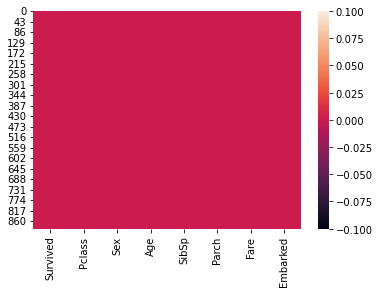

In [40]:
sns.heatmap(df.isnull())

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)

Uni variate analysis works with only one variable, hence it is called as uni variate.

In [41]:
features = df[["Survived", "Pclass","Sex", "Age", "SibSp", "Parch", "Fare","Embarked"]]

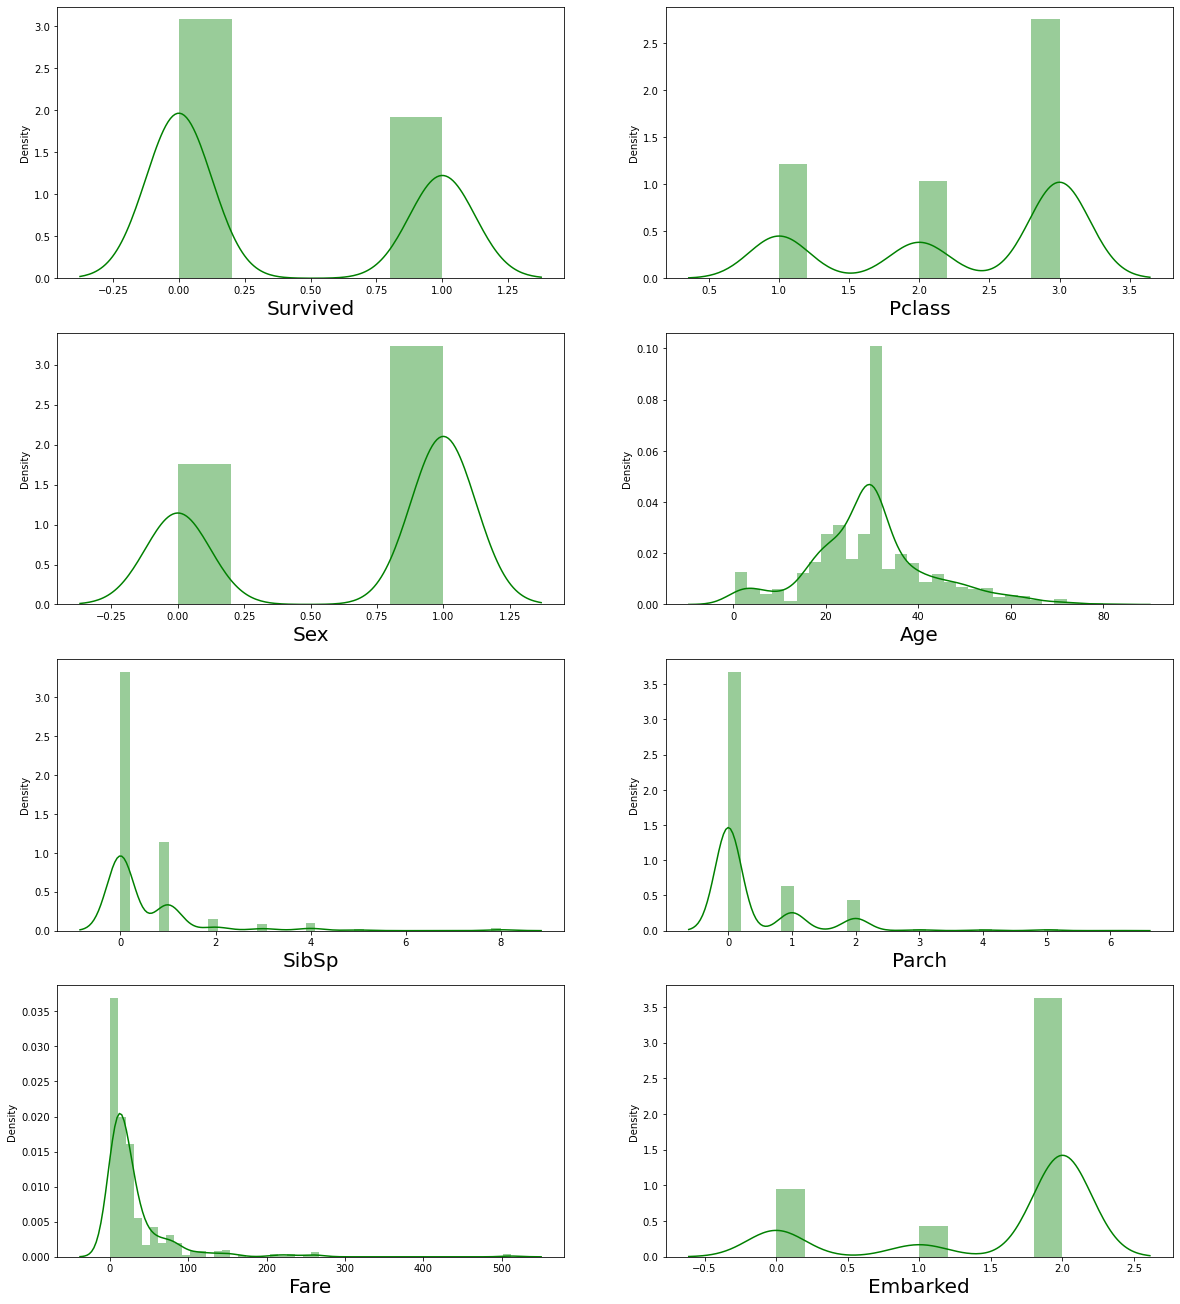

In [42]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(features[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot 'Fare' input variable is having skewness in it. Other Data columns are categorical in nature. So, we need remove skewness from Fare input variable.

Survived is a targate variable and it is having multiple classes. so, it is a multiclassification problem.

### Analysis through boxplot

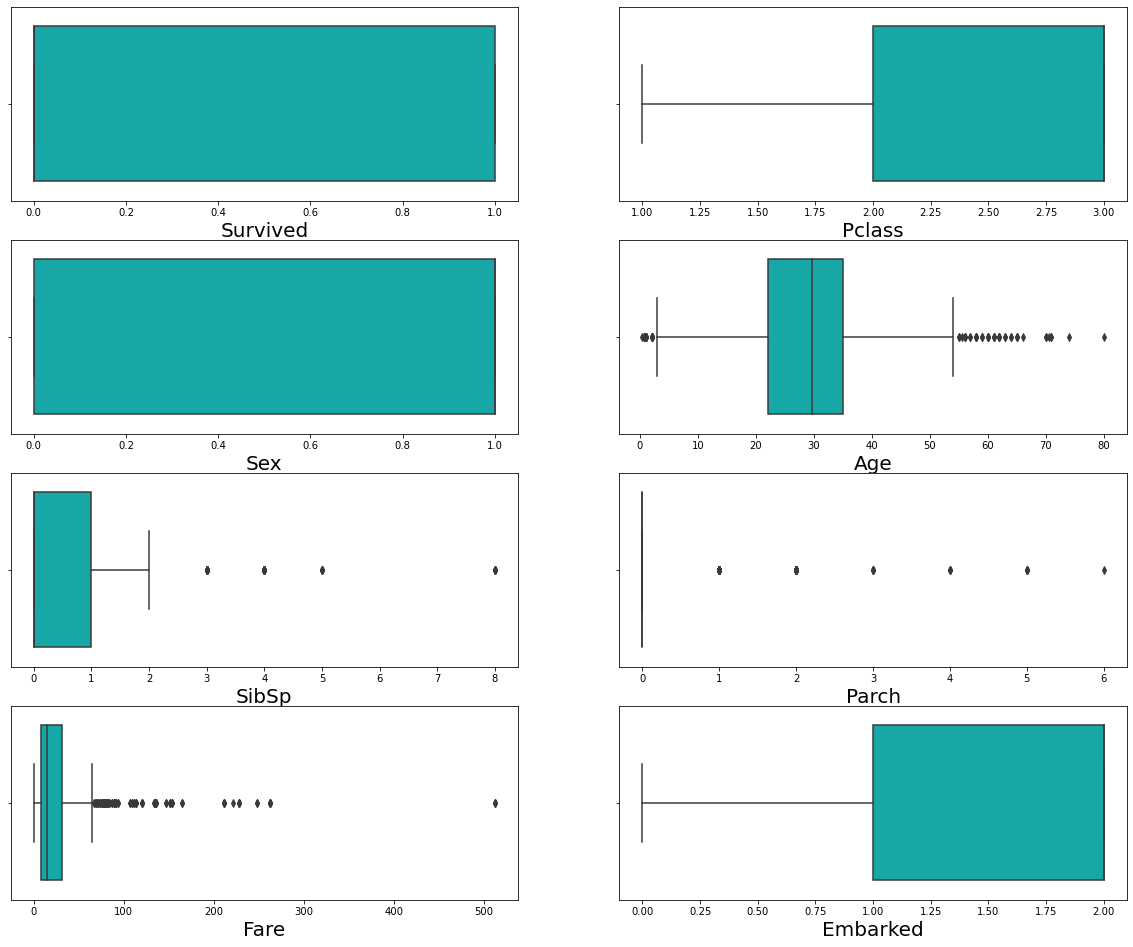

In [43]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 12: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(features[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we have seen in boxplot Age, Sibsp, Parch and Fare input variable is having outliers in it.

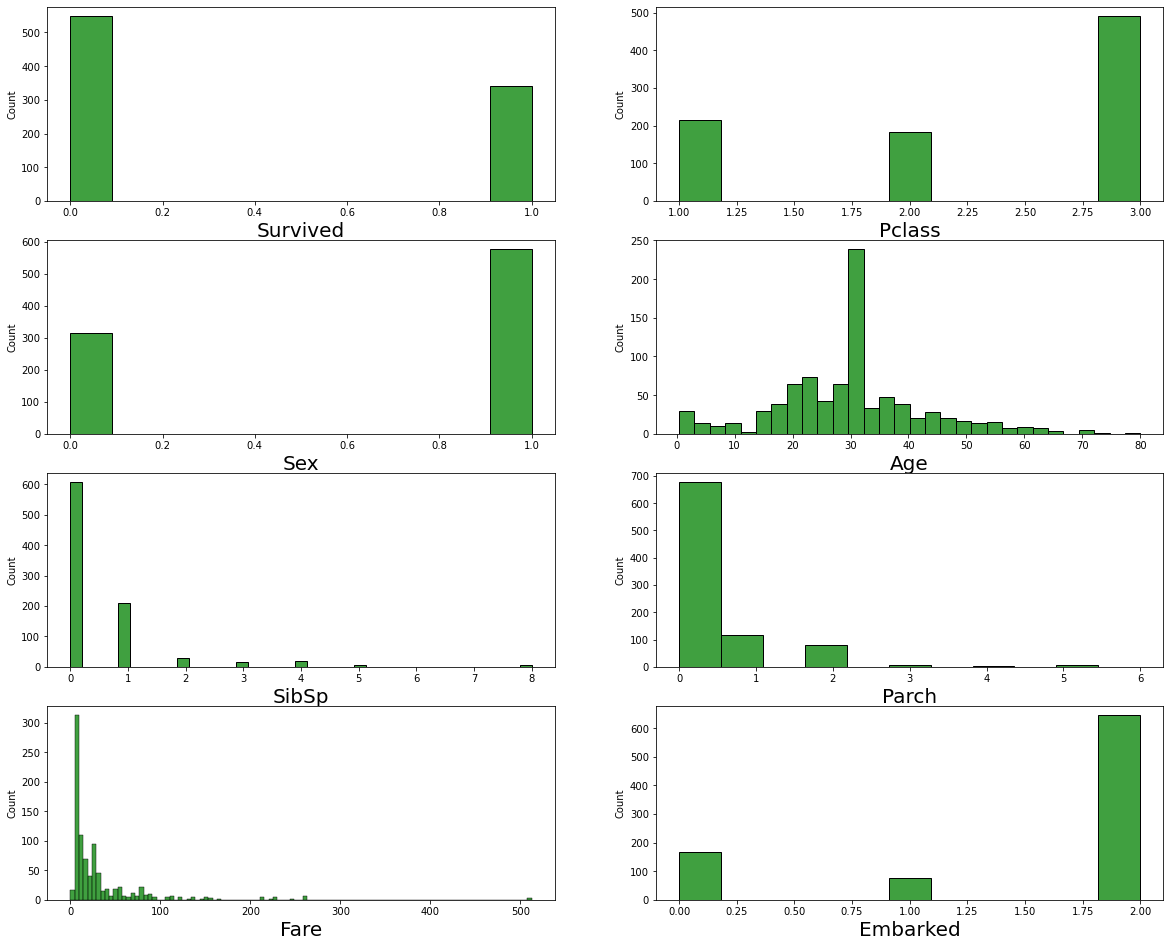

In [44]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sns.histplot(features[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

#### Age

<AxesSubplot:xlabel='Age'>

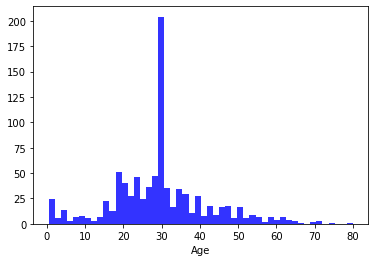

In [45]:
sns.distplot(df['Age'],kde=False,bins=50,hist_kws={'color':'blue','alpha':0.8})

Having a look at this chart, I would like to know if the age had any impact on being a survivor or not. Therefore, I will transform these numerical values into categorical values in order to determine if any category was spared more than another.

In [46]:
df['Age_cat']=0
for i in range(0,df.shape[0]):
    if df['Age'][i]<=10:
        df['Age_cat'][i]='0-10'
    elif df['Age'][i]>10 and df['Age'][i]<=20:
        df['Age_cat'][i]='11-20'
    elif df['Age'][i]>20 and df['Age'][i]<=30:
        df['Age_cat'][i]='21-30'
    elif df['Age'][i]>30 and df['Age'][i]<=40:
        df['Age_cat'][i]='31-40'
    elif df['Age'][i]>40 and df['Age'][i]<=50:
        df['Age_cat'][i]='41-50'       
    elif df['Age'][i]>50 and df['Age'][i]<=60:
        df['Age_cat'][i]='51-60'
    elif df['Age'][i]>60 and df['Age'][i]<=70:
        df['Age_cat'][i]='61-70'
    elif df['Age'][i]>70 and df['Age'][i]<=80:
        df['Age_cat'][i]='71-80'

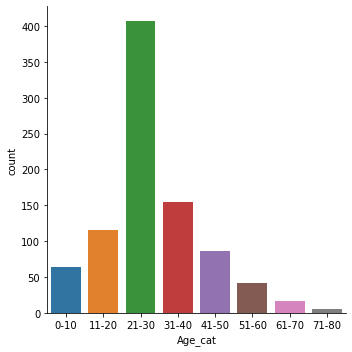

In [47]:
sns.catplot(x='Age_cat',data=df,kind='count',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

Most passengers were aged between 21 and 30 years old.

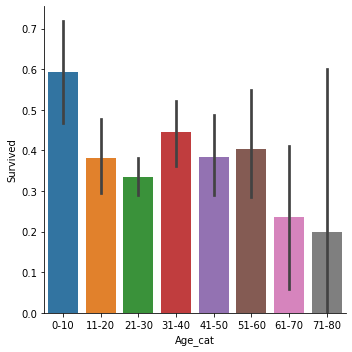

In [48]:
sns.catplot(x='Age_cat',y='Survived',data=df,kind='bar',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

On average, it looks like babies and kids had more chance to survive.

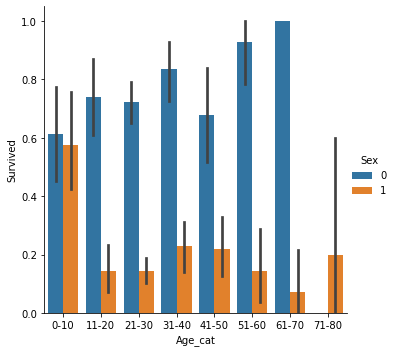

In [49]:
sns.catplot(x='Age_cat',y='Survived',data=df,kind='bar',hue='Sex',
            order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

On this chart we see that on average females between 61 and 70 y.o were more likely to survive than the other categories. For males, it is clear that young kids between 0 and 10 y.o were more likely to survive.

### Bi variate analysis

Bi variate analysis is works with two variables.

In [50]:
features = df[["Survived", "Pclass","Sex", "Age", "SibSp", "Parch", "Fare","Embarked"]]

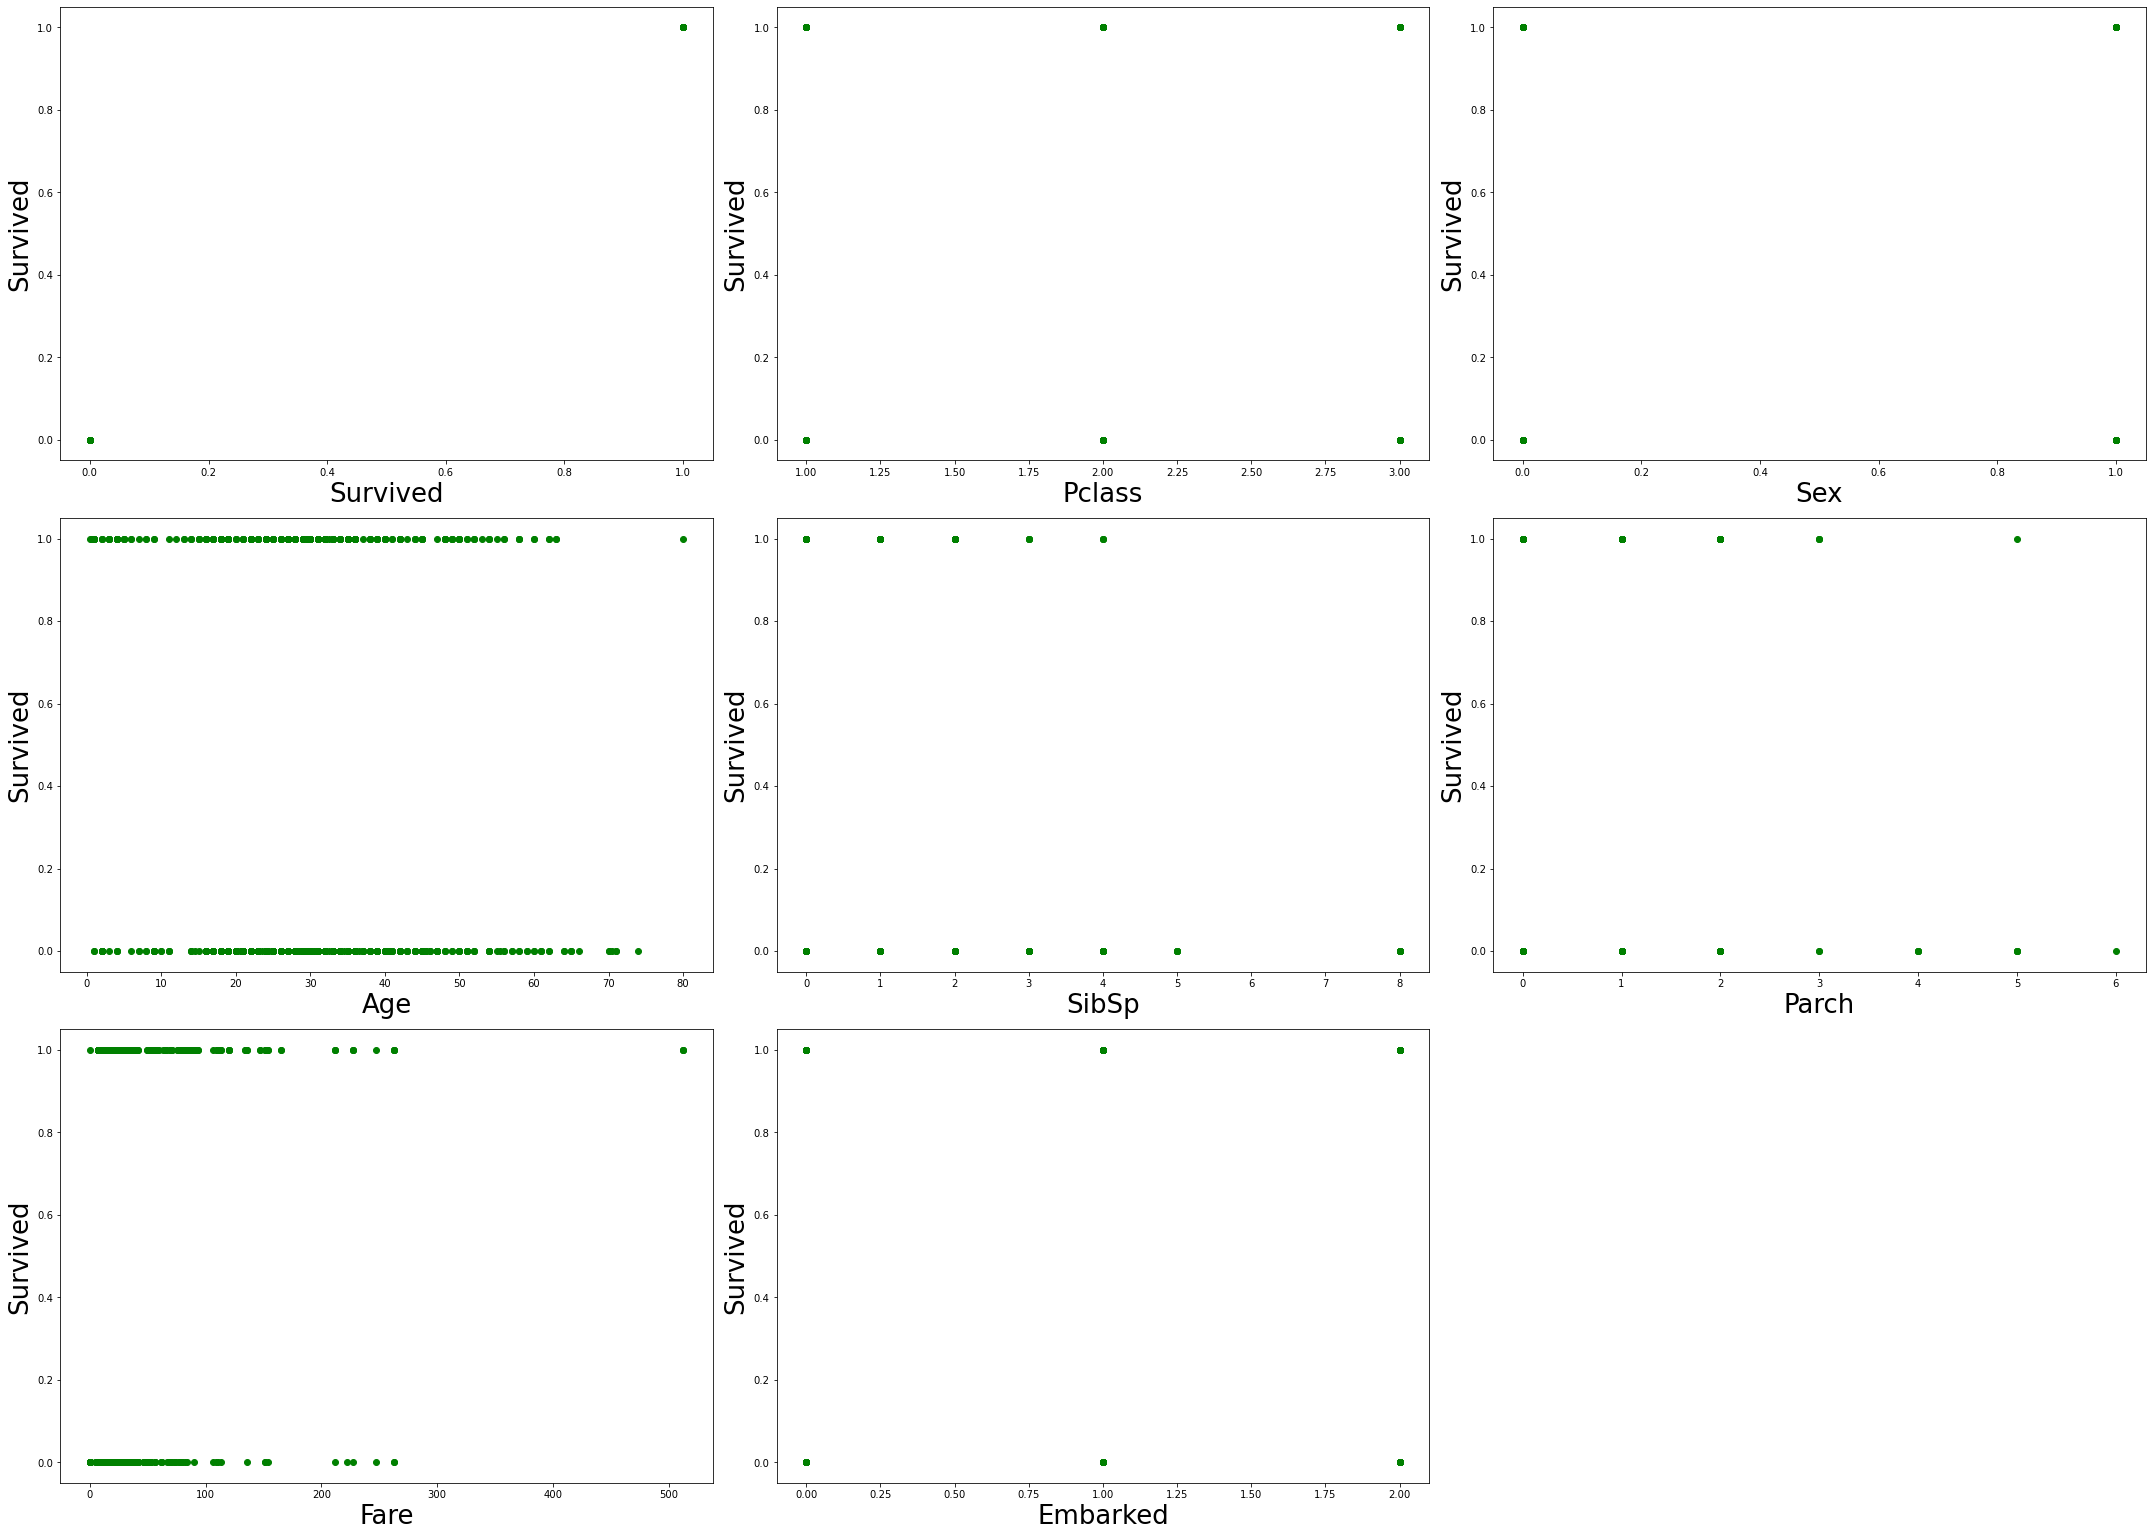

In [51]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],features['Survived'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Survived', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot all columns are having categorical data except Age and Fare column.

### Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

In [52]:
#check correlation
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


Let's create a heatmap to visualize the data better.

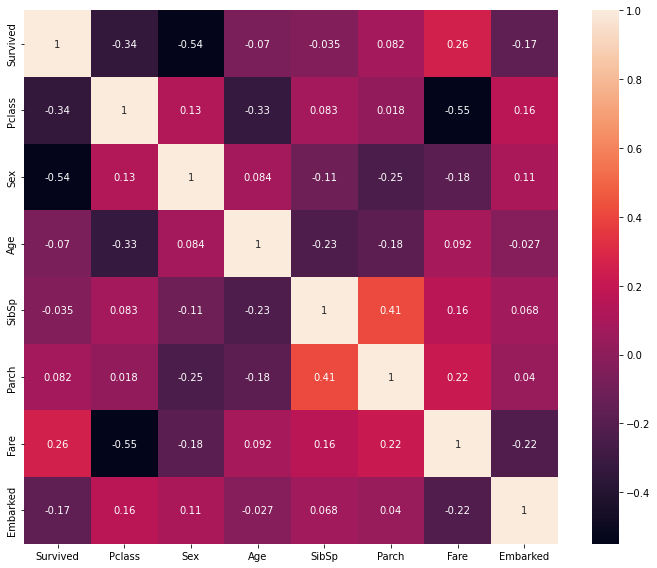

In [53]:
df_cor = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(df_cor, annot=True, square=True)
plt.tight_layout()

Here we can clearly see that:

- 'Pclass' is negatively correlated to 'Survived' (-0.34)
- 'Fare' is positively correlated to 'Survived' (0.26)

These two features should be decisive in model building.

#### Find out which columns are positively and negatively correlated with each other


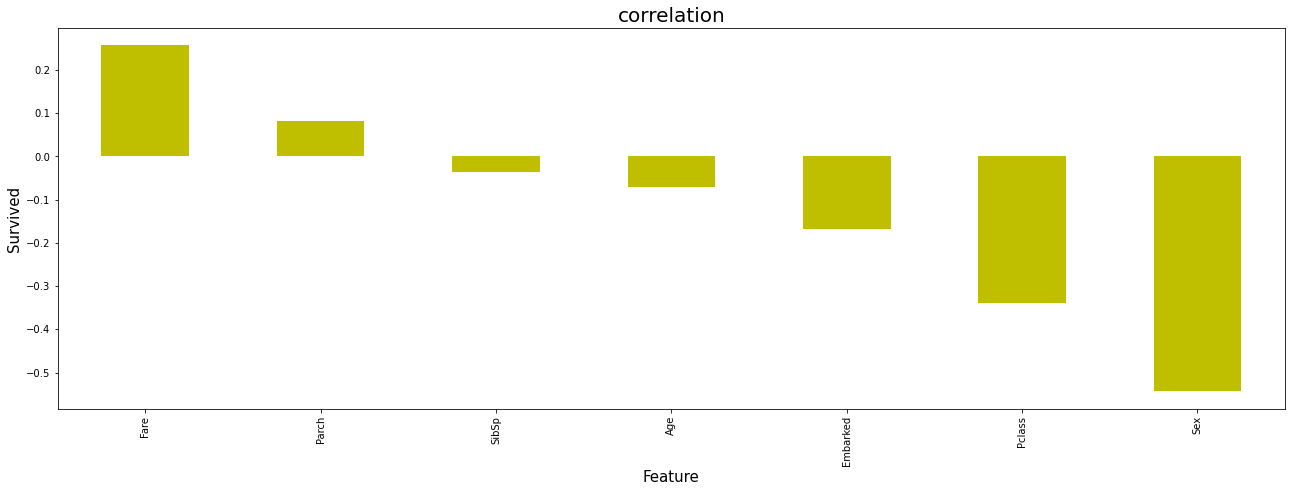

In [54]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Survived', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

As we see Fare is having positive correlation with the target variable and Pclass and Sex columns are having negative correlation with the target variable.

#### SibSp + Parch

In [55]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,1,22.000000,1,0,7.2500,2,21-30
1,1,1,0,38.000000,1,0,71.2833,0,31-40
2,1,3,0,26.000000,0,0,7.9250,2,21-30
3,1,1,0,35.000000,1,0,53.1000,2,31-40
4,0,3,1,35.000000,0,0,8.0500,2,31-40
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,21-30
887,1,1,0,19.000000,0,0,30.0000,2,11-20
888,0,3,0,29.699118,1,2,23.4500,2,21-30
889,1,1,1,26.000000,0,0,30.0000,0,21-30


#### As 'SibSp' and 'Parch' are related, I will try to create a new feature called 'Family size'. I will then visualize this new feature and determine if larger/smaller families had more chance to survive.

In [56]:
df['Family Size'] = df['SibSp'] + df['Parch']

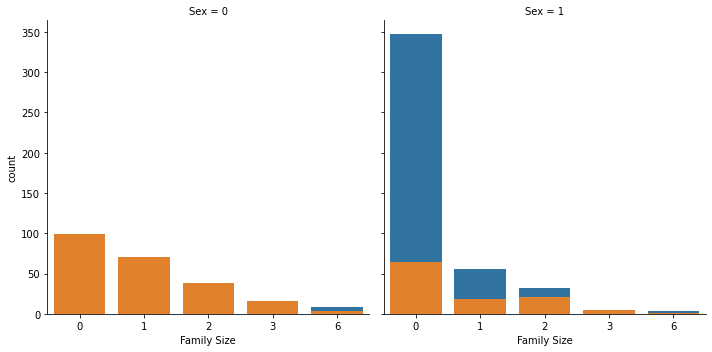

In [57]:
sns.FacetGrid(df,col='Sex',hue='Survived',height=5).map(sns.countplot,'Family Size')

These two graphs are very insightful:

- On the one hand, all females survived if they were either alone, or having a family between 1 and 3 people.
- On the other hand, males were less likely to survive if they were alone or having a family of 1 person (spouse?). Between 2 and 4 persons in the family, they had more chance to survive.

#### Fare

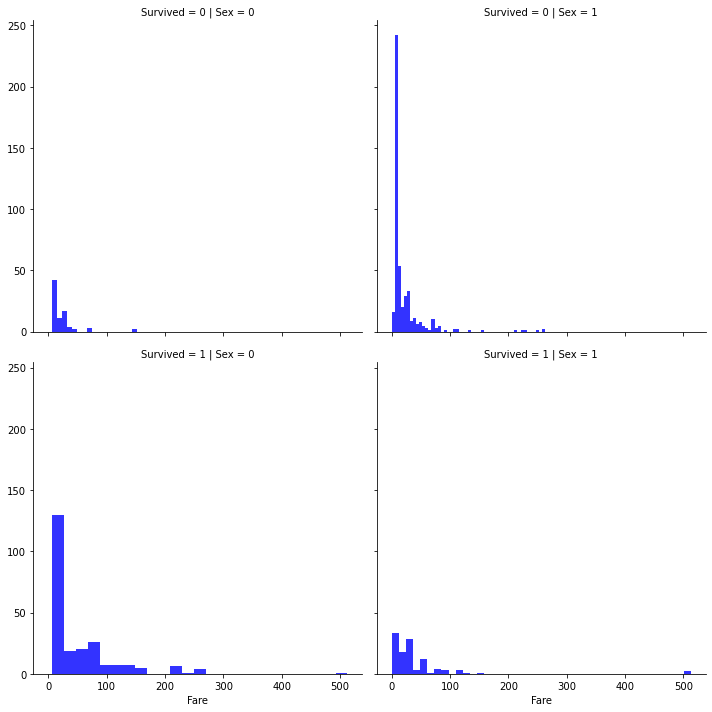

In [58]:
sns.FacetGrid(df,row='Survived',col='Sex',height=5).map(sns.distplot,'Fare',kde=False,hist_kws={'color':'blue','alpha':0.8})

We notice here that the "Fare" data looks more spread if passengers survived.

In [59]:
print('Mean fare of male who survived:',df[(df['Survived']==1) & (df['Sex']==1)]['Fare'].mean())
print('Mean fare of female who survived:',df[(df['Survived']==1) & (df['Sex']==0)]['Fare'].mean())
print('Mean fare of male who did not survive:',df[(df['Survived']==0) & (df['Sex']==1)]['Fare'].mean())
print('Mean fare of female who did not survive:',df[(df['Survived']==0) & (df['Sex']==0)]['Fare'].mean())

Mean fare of male who survived: 40.82148440366974
Mean fare of female who survived: 51.93857339055791
Mean fare of male who did not survive: 21.960992948717944
Mean fare of female who did not survive: 23.02438518518519


Looking at the mean for each category, it is quite clear that male and female who survived had on average a higher fare than those who did not survive.

#### 'Sex' column

In [60]:
print("{0:.0%}".format(df['Sex'].value_counts()[1]/df.shape[0]),"of passengers are male.")
print("{0:.0%}".format(df['Sex'].value_counts()[0]/df.shape[0]),"of passengers are female.")

65% of passengers are male.
35% of passengers are female.


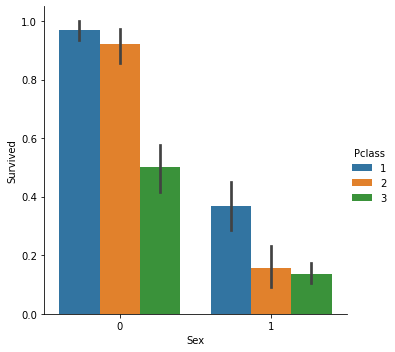

In [61]:
sns.catplot(x='Sex',y='Survived',data=df,kind='bar',hue="Pclass")

There are two main insights here:

- Males are on average less likely to survive than females
- Third classes are less likely to survive than the others (huge gap between second and third class in female category)

  Even women from third class were more likely to survive than men from first class. 

We can imagine that "Sex" and "Pclass" will be important features for our model.

#### Embarked

In [62]:
print("{0:.0%}".format(df['Embarked'].value_counts()[2]/df.shape[0]),"of passengers embarked from Southampton (S).") 
print("{0:.0%}".format(df['Embarked'].value_counts()[0]/df.shape[0]),"of passengers embarked from Cherbourg (C).") 
print("{0:.0%}".format(df['Embarked'].value_counts()[1]/df.shape[0]),"of passengers embarked from Queenstown (Q).") 

73% of passengers embarked from Southampton (S).
19% of passengers embarked from Cherbourg (C).
9% of passengers embarked from Queenstown (Q).


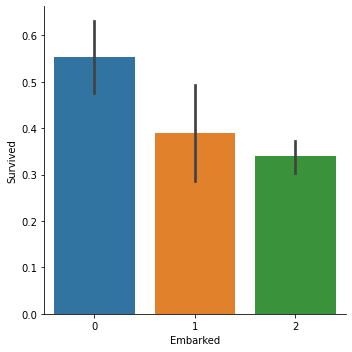

In [63]:
sns.catplot(x='Embarked',y='Survived',data=df,kind='bar')

Here is another insightful graph. It looks like passengers who embarked from C were most likely to survive (on average).

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Family Size
0,0,3,1,22.000000,1,0,7.2500,2,21-30,1
1,1,1,0,38.000000,1,0,71.2833,0,31-40,1
2,1,3,0,26.000000,0,0,7.9250,2,21-30,0
3,1,1,0,35.000000,1,0,53.1000,2,31-40,1
4,0,3,1,35.000000,0,0,8.0500,2,31-40,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,21-30,0
887,1,1,0,19.000000,0,0,30.0000,2,11-20,0
888,0,3,0,29.699118,1,2,23.4500,2,21-30,3
889,1,1,1,26.000000,0,0,30.0000,0,21-30,0


Here are the aditional data cleaning steps I wanna perform:

- Remove 'SibSp' and 'Parch' as these two features are now counted in 'Family Size'
- Remove 'Age_cat' as its only purpose was for the EDA

#### Dropping features

In [65]:
df.drop(['SibSp','Parch','Age_cat'], axis=1, inplace=True)

In [66]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,1,22.000000,7.2500,2,1
1,1,1,0,38.000000,71.2833,0,1
2,1,3,0,26.000000,7.9250,2,0
3,1,1,0,35.000000,53.1000,2,1
4,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2,0
887,1,1,0,19.000000,30.0000,2,0
888,0,3,0,29.699118,23.4500,2,3
889,1,1,1,26.000000,30.0000,0,0


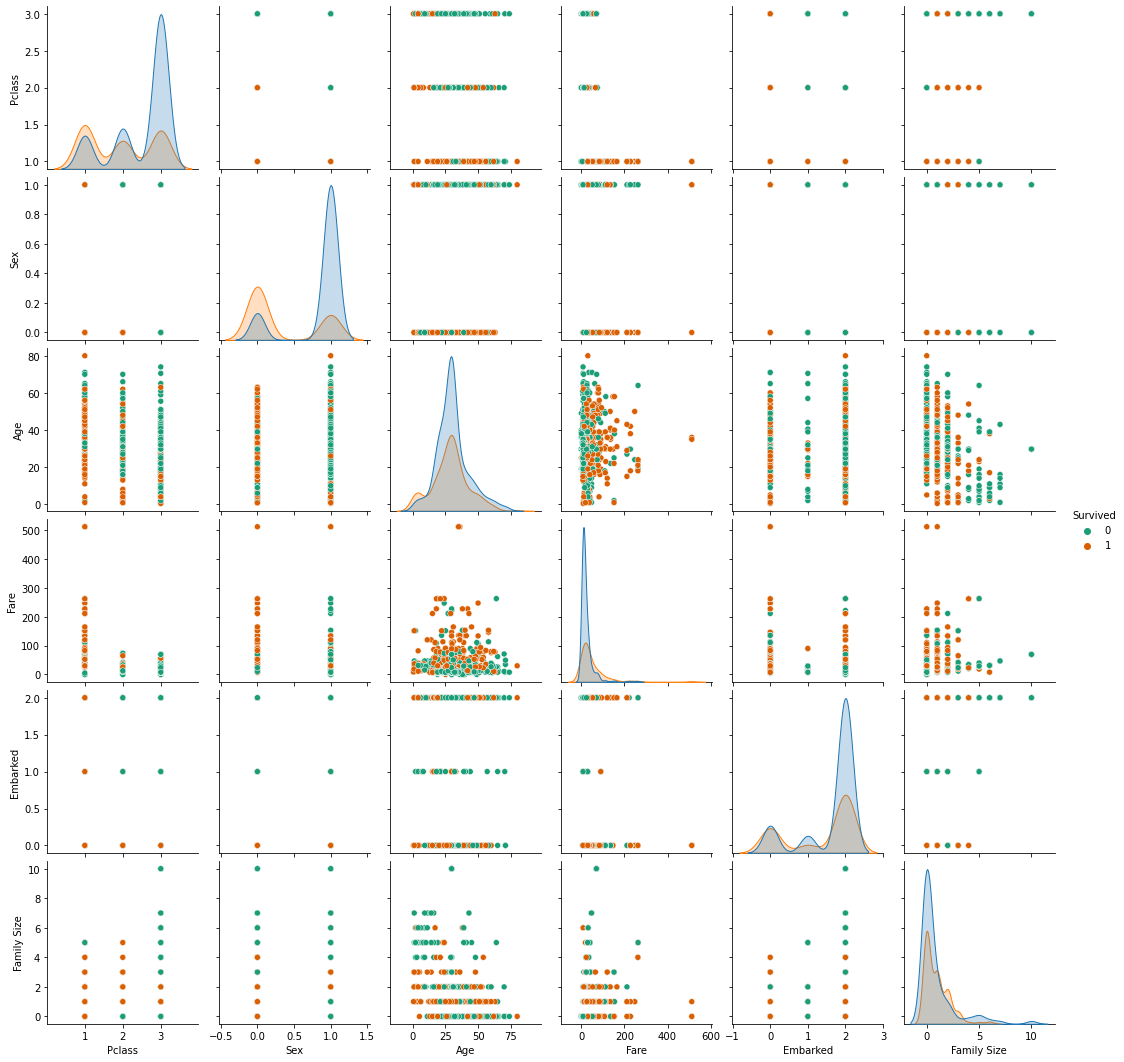

In [67]:
sns.pairplot(df,hue="Survived",plot_kws={'palette':'Dark2','alpha':1})

## Remove outliers

In [68]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int32
Age            float64
Fare           float64
Embarked         int32
Family Size      int64
dtype: object

as shown in above only 2 columns are continuous in nature.

## 1. Outlier removal using Zscore


In [69]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['Age','Fare']])
abs_z_score = np.abs(z_score)

data = (abs_z_score < 3).all(axis = 1)

new_df = df[data]

print("shape before :", df.shape)
print("shape after :", new_df.shape)
print("Percentage Loss :", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before : (891, 7)
shape after : (864, 7)
Percentage Loss : 0.030303030303030304


3.03% data loss after using Zscore technique

96.97% data remains.

In [70]:
new_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,0.650463,29.322935,26.500689,1.555556,0.888889
std,0.485287,0.819028,0.477100,12.490450,29.400192,0.777235,1.602914
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,13.860400,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,29.775000,2.000000,1.000000
max,1.000000,3.000000,1.000000,66.000000,164.866700,2.000000,10.000000


In [71]:
#check any missing values
new_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

### Visualize data again to check outliers are present at low side or high side


In [72]:
data = df

In [73]:
#features in which outliers are detected
features = data[["Age", "Fare"]]

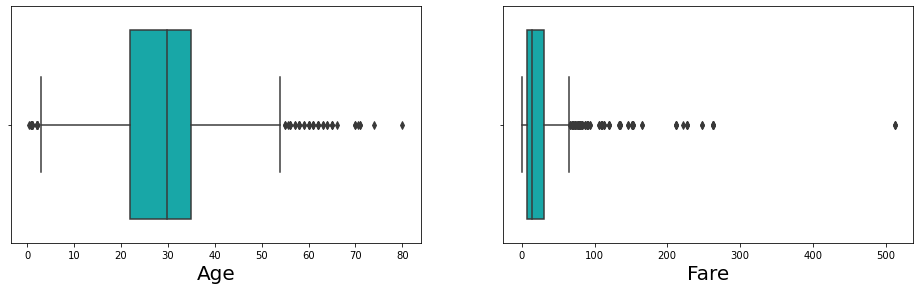

In [74]:
plt.figure(figsize=(25,20))
graph = 1

for column in features:
    if graph <= 30:
        ax = plt.subplot(4,3, graph)
        sns.boxplot(features[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()


In [75]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data.quantile(0.25)

#3rd quantile 75%
q3 = data.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [76]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,1.536476,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


### Outlier detection formula

- Higher side ==> Q3 + (1.5 * IQR)
- Lower side ==> Q1 - (1.5 * IQR)

#### Outliers removal from higher side


In [77]:
#as shown in boxplot we have outlier in higher side of Age also
#Remove outliers from higher side so, use higher side formula

Age_high = (q3.Age + (1.5*(iqr.Age)))
Age_high

54.5

In [78]:
index_out = np.where(data['Age'] > Age_high)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

,index,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,0,3,1,22.000000,7.2500,2,1
1,1,1,1,0,38.000000,71.2833,0,1
2,2,1,3,0,26.000000,7.9250,2,0
3,3,1,1,0,35.000000,53.1000,2,1
4,4,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...,...
844,886,0,2,1,27.000000,13.0000,2,0
845,887,1,1,0,19.000000,30.0000,2,0
846,888,0,3,0,29.699118,23.4500,2,3
847,889,1,1,1,26.000000,30.0000,0,0


after removing outliers from higher side 849 rows will remain in dataframe.

In [79]:
#as shown in boxplot we have outlier in lower side of Age also
#Remove outliers from lower side so, use lower side formula

Age_low = (q1.Age - (1.5*(iqr.Age)))
Age_low

2.5

In [80]:
index_out = np.where(data['Age'] < Age_low)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

,index,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,0,3,1,22.000000,7.2500,2,1
1,1,1,1,0,38.000000,71.2833,0,1
2,2,1,3,0,26.000000,7.9250,2,0
3,3,1,1,0,35.000000,53.1000,2,1
4,4,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...,...
820,886,0,2,1,27.000000,13.0000,2,0
821,887,1,1,0,19.000000,30.0000,2,0
822,888,0,3,0,29.699118,23.4500,2,3
823,889,1,1,1,26.000000,30.0000,0,0


after removing outliers from lower side 825 rows will remain in dataframe.

In [81]:
#Check the Outliers for Fare
#Remove outliers from higher side so, use higher side formula

fare_ = (q3.Fare + (1.5*(iqr.Fare)))
fare_

65.6344

In [82]:
index_out = np.where(data['Fare'] > fare_)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

,index,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,0,3,1,22.000000,7.2500,2,1
1,2,1,3,0,26.000000,7.9250,2,0
2,3,1,1,0,35.000000,53.1000,2,1
3,4,0,3,1,35.000000,8.0500,2,0
4,5,0,3,1,29.699118,8.4583,1,0
...,...,...,...,...,...,...,...,...
716,886,0,2,1,27.000000,13.0000,2,0
717,887,1,1,0,19.000000,30.0000,2,0
718,888,0,3,0,29.699118,23.4500,2,3
719,889,1,1,1,26.000000,30.0000,0,0


after removing outliers from Fare 721 rows will remain in dataframe.

#### After removing outliers using IQR technique there are 721 rows will remain in dataset.

Now, find how much data loss in IQR method

In [83]:
((891-721)/891)*100

19.07968574635241

19.08% data loss in IQR method

80.92% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique

## Check the skewness and remove that


In [84]:
new_df.skew()

Survived       0.502011
Pclass        -0.708375
Sex           -0.632203
Age            0.239002
Fare           2.257178
Embarked      -1.328443
Family Size    2.806089
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only continuous data columns like Age and Fare in which only Fare column have skewness in it. So, we need to remove skewness from Fare only.

and maximum columns contains categorical values. so no need to remove skewness from that.


#### We need to remove skewness from Fare column

## Apply Power transformation to remove skewness


In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data.

In [85]:
#applying log transformation on skewed columns

new_df['Fare'] = new_df['Fare'].replace(0,new_df['Fare'].mean())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

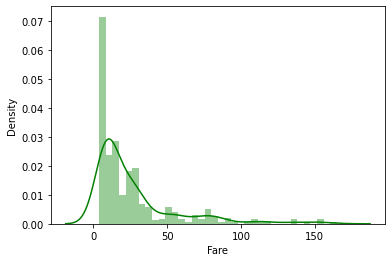

In [86]:
sns.distplot(new_df['Fare'], color='g')


As shown in plot less skewness present after using power transformation skewness removal technique.

## Seperating the columns into featuers and target:

### X=Features, Y=Target

In [87]:
x = new_df.drop(columns = 'Survived', axis=1)
y = new_df['Survived']

### Scalling technique


In [88]:
#import Library
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

using standard scaler technique variables are scaled now.

## Variance inflation factor


In [89]:
new_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,2.245551,Pclass
1,1.090211,Sex
2,1.205030,Age
3,2.333180,Fare
4,1.053849,Embarked
5,1.370766,Family Size


as we have seen in the table vif value is not greater than 5 for any columns, so no need to drop columns.

In [91]:
new_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,1,22.000000,7.2500,2,1
1,1,1,0,38.000000,71.2833,0,1
2,1,3,0,26.000000,7.9250,2,0
3,1,1,0,35.000000,53.1000,2,1
4,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2,0
887,1,1,0,19.000000,30.0000,2,0
888,0,3,0,29.699118,23.4500,2,3
889,1,1,1,26.000000,30.0000,0,0


## Finding best random state


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
from sklearn.tree import DecisionTreeClassifier
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8379629629629629 on Random_state  102


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state = 102)


## 1. Logistic Regression Model


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [96]:
pred_test=Log_reg.predict(x_test)

print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8148148148148148
[[111  18]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       129
           1       0.78      0.75      0.76        87

    accuracy                           0.81       216
   macro avg       0.81      0.80      0.81       216
weighted avg       0.81      0.81      0.81       216



In [97]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7928485011426266

The Accuracy score for logistic regression model is : 81.48%
    
Cross validation score for logistic regression is : 79.28%

## 2. Random forest Classifier


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt'}


In [99]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="sqrt")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  84.72222222222221
Cross Val Score:  79.39814814814814


The Accuracy score for Random Forest Classifier model is : 84.72%
    
Cross validation score for Random Forest Classifier is : 79.39%

## 3. Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
pred_DT = DT.predict(x_test)

print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

0.8240740740740741
[[113  16]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.80      0.75      0.77        87

    accuracy                           0.82       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.82      0.82      0.82       216



In [102]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7777994354079849

The Accuracy score for Decision tree Classifier model is : 82.40%
    
Cross validation score for Decision tree Classifier is : 77.77%

## 4. Support vector Classifier


In [103]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(x_train, y_train)
pred_sv = sv.predict(x_test)

print(accuracy_score(y_test,pred_sv))
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))


0.8472222222222222
[[116  13]
 [ 20  67]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       129
           1       0.84      0.77      0.80        87

    accuracy                           0.85       216
   macro avg       0.85      0.83      0.84       216
weighted avg       0.85      0.85      0.85       216



In [104]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6666823497781961

The Accuracy score for SVC model is : 84.72%
    
Cross validation score for SVC is : 66.66%

## Comparison of all model


       Algorithms            Accuracy score    Cross validation   Difference
    
1. Logistic Regression       :    81.48%           79.28%           2.2% 
    
2. Random Forest Classifier  :    84.72%           79.39%           5.33%
    
3. Decision Tree Classifier  :    82.40%           77.77%           4.63%
    
4. Support Vector Classifier :    84.72%           66.66%           18.06%

### as shown in above table Logistic Regression is having minimum difference, so Logistic Regression is best model


## Hyperparameter tuning

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

grid = GridSearchCV(LogisticRegression(), parameters, cv=5)

grid.fit(x_train,y_train)
print(grid)

#summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})
0.7948717948717948
LogisticRegression(C=1, penalty='l1', solver='saga')


In [106]:
lr = LogisticRegression( C=1, penalty='l1', solver='saga')

lr.fit(x_train, y_train)
pred =lr.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8148148148148148
[[111  18]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       129
           1       0.78      0.75      0.76        87

    accuracy                           0.81       216
   macro avg       0.81      0.80      0.81       216
weighted avg       0.81      0.81      0.81       216



### after hyper parameter tunning accuracy score is: 81.48%

In [107]:
new_df['Survived'].unique()

array([0, 1], dtype=int64)

## ROC AUC curve to choose best model

In [108]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [109]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [110]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [111]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## Find ROC AUC Score


In [112]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.8037957765303395

In [113]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.8402833466987437

In [114]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.8039294306335205

In [115]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.8346698743651431

## ROC AUC curve for fitted model


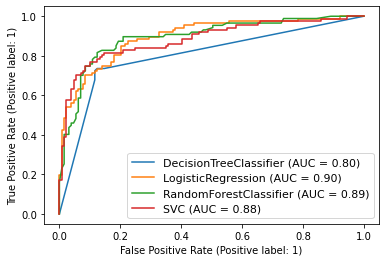

In [116]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model


In [117]:
import joblib
joblib.dump(mod,"TitanicProject.pkl")

['TitanicProject.pkl']

## Loding model


In [118]:
model = joblib.load("TitanicProject.pkl")
prediction = model.predict(x_test)

#converted into data frame
prediction=pd.DataFrame(prediction)


In [119]:
#prediction saving
prediction.to_csv('ResultsTitanicProject.csv', index = False)
